# Multiple Linear Regression - Additive Features

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Import Modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Multiple Linear Regression - Understanding How Additive Features Affect Data

### **Additive** features add the effect of input 2 to the effect of input 1.

$\mu = \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2$

$\mu$ **predicted trend**

$\beta_0$ **intercept**: value of $\mu$ when $x = 0$

$\beta_1$ **slope**: change in $\mu$ for a one-unit increase in $x_1$

$x_1$ **feature** or **input variable**: one of the independent variables used to predict $\mu$

$\beta_2$ **slope**: change in $\mu$ for a one-unit increase in $x_2$

$x_2$ **feature** or **input variable**: one of the independent variables used to predict $\mu$

### Additive linear relationships is where we calculate the average output or trend given input 1 and input 2 and the 3 regression coefficients as we will create a funciton that will allow visualization of the trend with respect to input 1.

In [39]:
def calc_trend_wrt_x1(x1, 
                      x2, 
                      b0, 
                      b1, 
                      b2):
    """
    Calculates the linear trend based on two independent variables x1 and x2, using the provided coefficients.
    
    Args:
        x1 (array-like): Values for the first independent variable.
        x2 (array-like): Values for the second independent variable.
        b0 (float): Intercept coefficient.
        b1 (float): Coefficient for x1.
        b2 (float): Coefficient for x2.
    
    Returns:
        pandas.DataFrame: DataFrame containing columns for x1, x2, and the calculated trend.
    """
    res_df = pd.DataFrame({'x1': x1})
    res_df['x2'] = x2
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2
    return res_df

### To demonstrate the relationships, let's define the following coefficients.

In [40]:
b0 = -0.25
b1 = 1.95
b2 = 0.2

### Let's define 101 evenly or uniformly spaced values of `x1` between -3 and 3.

In [41]:
x1_values = np.linspace(-3, 
                        3, 
                        101)

In [42]:
x1_values

array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
       -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
       -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
       -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
       -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
       -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
        0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
        0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,  1.2 ,  1.26,
        1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
        1.86,  1.92,  1.98,  2.04,  2.1 ,  2.16,  2.22,  2.28,  2.34,
        2.4 ,  2.46,  2.52,  2.58,  2.64,  2.7 ,  2.76,  2.82,  2.88,
        2.94,  3.  ])

In [43]:
x1_values.size

101

In [44]:
x1_values.ndim

1

### Let's calculate the average output for a single value of `x2` at 0 where `x2` has 1 unique value 0, and it appears 101 times.

In [45]:
calc_trend_wrt_x1(x1_values, 
                  0, 
                  b0, 
                  b1, 
                  b2)

,x1,x2,trend
0,-3.00,0,-6.100
1,-2.94,0,-5.983
2,-2.88,0,-5.866
3,-2.82,0,-5.749
4,-2.76,0,-5.632
...,...,...,...
96,2.76,0,5.132
97,2.82,0,5.249
98,2.88,0,5.366
99,2.94,0,5.483


In [46]:
calc_trend_wrt_x1(x1_values, 
                  0, 
                  b0, 
                  b1, 
                  b2). \
                 x2.value_counts()

x2
0    101
Name: count, dtype: int64

### Let's visualize the relationship between the average output and input 1 where the average output has roughtly a change of 2 on the trend for a 1 unit change on the input as the slope is how much does the output change on average for a one unit change of the input.

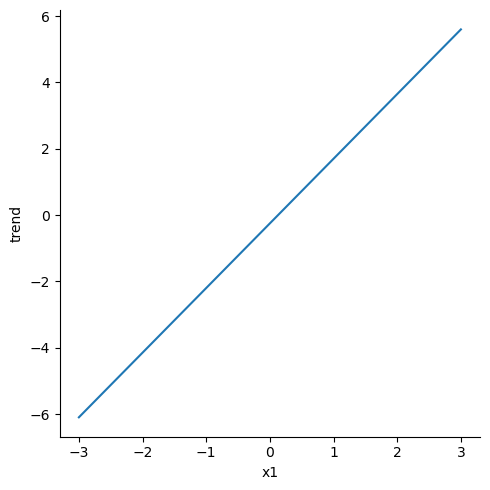

In [47]:
sns.relplot(data=calc_trend_wrt_x1(x1_values, 
                                   0, 
                                   b0, 
                                   b1, 
                                   b2), 
                                   x='x1', 
                                   y='trend', 
                                   kind='line')
plt.show()

### Now we will change `x2` from 0 to -2 as we can visualize the new trend as a 1 unit change in the input produces an almost 2 unit change on the trend but it is hard to see any difference from the prior graphic.

In [48]:
calc_trend_wrt_x1(x1_values, 
                  -2, 
                  b0, 
                  b1, 
                  b2)

,x1,x2,trend
0,-3.00,-2,-6.500
1,-2.94,-2,-6.383
2,-2.88,-2,-6.266
3,-2.82,-2,-6.149
4,-2.76,-2,-6.032
...,...,...,...
96,2.76,-2,4.732
97,2.82,-2,4.849
98,2.88,-2,4.966
99,2.94,-2,5.083


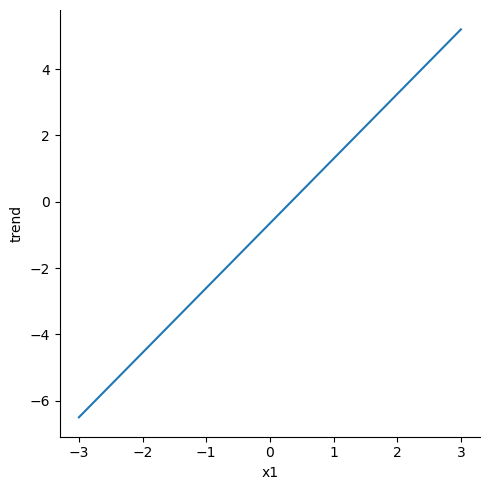

In [49]:
sns.relplot(data=calc_trend_wrt_x1(x1_values, 
                                   -2, 
                                   b0, 
                                   b1, 
                                   b2), 
                                   x='x1', 
                                   y='trend', 
                                   kind='line')
plt.show()

### Let's repeat or replicate calculating the trend with respect to `x1` for different values of `x2`.

In [ ]:
x2_values = np.linspace(-3, 
                        3, 
                        9)

In [51]:
x2_values

array([-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ])

In [52]:
study_wrt_x1_list = [calc_trend_wrt_x1(x1_values, x2, b0, b1, b2) for x2 in x2_values]

In [53]:
len(study_wrt_x1_list)

9

In [54]:
study_wrt_x1_list[0]

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
96,2.76,-3.0,4.532
97,2.82,-3.0,4.649
98,2.88,-3.0,4.766
99,2.94,-3.0,4.883


### Combine or concat the separate DataFrames together.

In [55]:
study_wrt_x1_df = pd.concat(study_wrt_x1_list, ignore_index=True)

In [56]:
study_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
904,2.76,3.0,5.732
905,2.82,3.0,5.849
906,2.88,3.0,5.966
907,2.94,3.0,6.083


In [57]:
study_wrt_x1_df.x2.value_counts()

x2
-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: count, dtype: int64

### Visualize the trend or average output with respect to `x1` for each unique value of `x2` as a line chart as it will include the 95% confidence interval as this is a summation of the data.

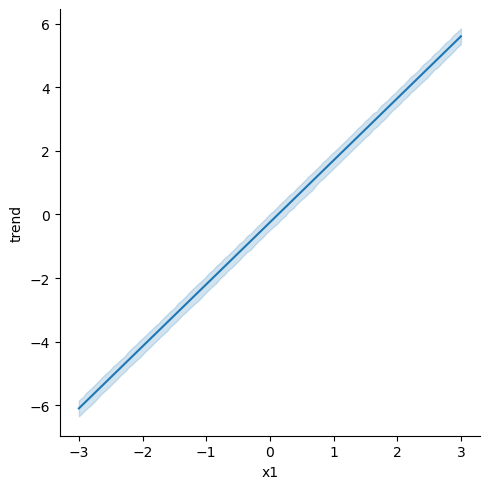

In [58]:
sns.relplot(data=study_wrt_x1_df,
            x='x1',
            y='trend',
            kind='line')
plt.show()

### Visualize the raw data.

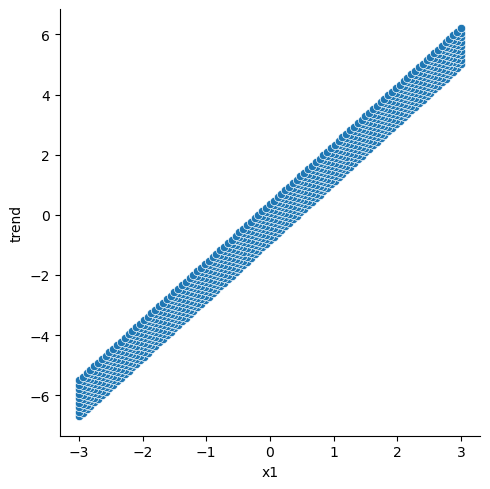

In [59]:
sns.relplot(data=study_wrt_x1_df,
            x='x1',
            y='trend',
            kind='scatter')
plt.show()

### We need to disable Seaborn's default line chart averaging.

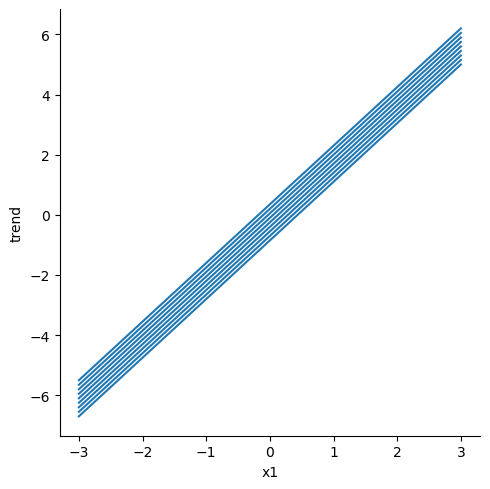

In [60]:
sns.relplot(data=study_wrt_x1_df,
            x='x1',
            y='trend',
            kind='line',
            estimator=None,
            units='x2')
plt.show()

### We can associate the line color to `x2` via the `hue` argument.

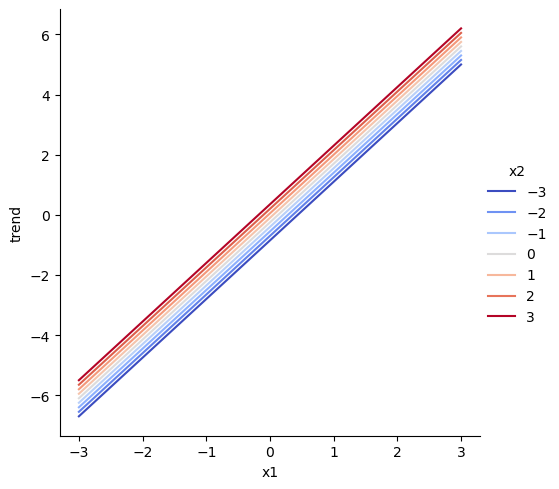

In [61]:
sns.relplot(data=study_wrt_x1_df,
            x='x1',
            y='trend',
            hue='x2',
            kind='line',
            palette='coolwarm',
            estimator=None,
            units='x2')
plt.show()

### **WHEN WE HAVE ADDITIVE FEATURES WHICH ARE ADDING THE EFFECT OF INPUT 2 TO THE EFFECT OF INPUT 1, WE ARE LITERALLY SHIFTING THE LINE UP OR DOWN.**

### Additive features add the effect of one input to the other and if the inputs have the same magnitude of and scale, the magnitude of the slope tells you which input causes the greater change on the average output.

In [75]:
b1

1.95

### In the above we have the slope $\beta_1$ very close to 2, therefore, a 1 unit change in `x1` is producing a 2 unit change in the trend or average output.

### Let's focus on the relationship with respect to `x2`.

In [62]:
def calc_trend_wrt_x2(x1, 
                      x2, 
                      b0, 
                      b1, 
                      b2):
    """
    Calculates the linear trend based on two independent variables x1 and x2, using the provided coefficients.
    
    Args:
        x1 (array-like): Values for the first independent variable.
        x2 (array-like): Values for the second independent variable.
        b0 (float): Intercept coefficient.
        b1 (float): Coefficient for x1.
        b2 (float): Coefficient for x2.
    
    Returns:
        pandas.DataFrame: DataFrame containing columns for x1, x2, and the calculated trend.
    """
    res_df = pd.DataFrame({'x2': x2})
    res_df['x1'] = x1
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2
    return res_df

### Let's define 2 new arrays so we can visualize the trends with respect to `x2` for different values of `x1`.

In [63]:
x2_values_b = np.linspace(-3, 3, 101)

In [64]:
x2_values_b.shape

(101,)

In [65]:
x1_values_b = np.linspace(-3, 3, 9)

In [66]:
x1_values_b.shape

(9,)

### Iterate over values `x1`.

In [69]:
study_wrt_x2_list = [calc_trend_wrt_x2(x1, x2_values_b, b0, b1, b2) for x1 in x1_values_b]

In [70]:
len(study_wrt_x2_list)

9

In [71]:
study_wrt_x2_df = pd.concat(study_wrt_x2_list, ignore_index=True)

In [72]:
study_wrt_x2_df

,x2,x1,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.688
2,-2.88,-3.0,-6.676
3,-2.82,-3.0,-6.664
4,-2.76,-3.0,-6.652
...,...,...,...
904,2.76,3.0,6.152
905,2.82,3.0,6.164
906,2.88,3.0,6.176
907,2.94,3.0,6.188


In [73]:
study_wrt_x2_df.x1.value_counts()

x1
-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: count, dtype: int64

### Visualize the trend or average output with respect to `x2` for each unique value of `x1` as we will use the diverging color palette to help distinguish `x1` values above and below the `x1` midpoint.

In [76]:
b2

0.2

### In the above we have the slope $\beta_2$ 0.2, therefore, a 1 unit change in `x2` is producing a very small change in the trend or average output.

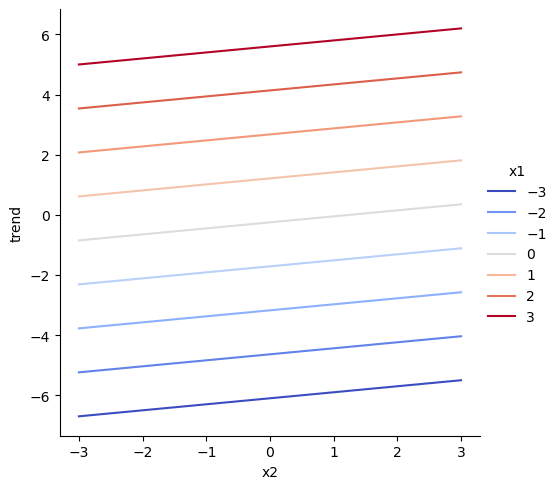

In [74]:
sns.relplot(data=study_wrt_x2_df,
            x='x2',
            y='trend',
            hue='x1',
            kind='line',
            palette='coolwarm',
            estimator=None,
            units='x1')
plt.show()